# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
temp=[]
lat=[]
long=[]
humidity=[]
windspeed=[]
cloud=[]
country=[]
date=[]
cityfound=[]
for city in cities:
    url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    try:
        weather=requests.get(url).json()
        temp.append(weather["main"]["temp"])
        lat.append(weather["coord"]["lat"])
        long.append(weather["coord"]["lon"])
        humidity.append(weather["main"]["humidity"])
        windspeed.append(weather["wind"]["speed"])
        cloud.append(weather["clouds"]["all"])
        country.append(weather["sys"]["country"])
        date.append(weather["dt"])
        cityfound.append(city)
        print("found " + city)
    except:
        print("couldn't find " + city)
        
temp

city_df=pd.DataFrame({"Temperature":temp,
                      "Latitude":lat,
                      "Longitude":long,
                      "Humidity":humidity,
                      "Wind Speed":windspeed,
                      "Cloud":cloud,
                      "Country":country,
                      "Date":date,
                      "City":cityfound
                      })

city_df


found sisimiut
found doka
couldn't find aflu
found mataura
found sao filipe
found gurupi
found caravelas
found shalinskoye
found bengkulu
found jamestown
couldn't find felidhoo
found meadow lake
found ushuaia
found boa vista
found ribeira grande
found alofi
found punta arenas
couldn't find nizhneyansk
found hobart
found saint-claude
couldn't find vaitupu
found porto novo
found vilyuysk
found ankazoabo
found uusikaupunki
couldn't find belushya guba
found puerto ayora
found ilulissat
found bac lieu
found fort nelson
found bredasdorp
couldn't find mys shmidta
found albany
found kaitangata
found beloha
found new norfolk
found panguna
found atar
found piacabucu
found tecoanapa
found margate
found rikitea
found airai
found tevaitoa
found bethel
found cape town
found palmerston
found katsuura
found vao
found richards bay
couldn't find tsihombe
found barrow
found kapaa
found trojes
found kaili
found chuy
found asau
found east london
found busselton
found hithadhoo
found tasiilaq
found rock spr

found smithers
found atasu
found valley city
found kieta
found pacific grove
found hasaki
found baherden
found birjand
found rio bueno
found gat
found nakamura
found darhan
found namwala
found vardo
found karratha
found turukhansk
found zharkent
found orlik
found maragogi
found maiduguri
found chimbote
found tiznit
found blagoyevo
found samarai
found rosetta
found carmelo
found gravdal
found black river
found kachug
found salinopolis
found almeirim
found arman
found zabaykalsk
found kidal
found prado
found mount gambier
found neepawa
couldn't find hvammstangi
found bathsheba
found barretos
couldn't find marcona
found dauriya
couldn't find katsiveli
found luba
couldn't find cumaribo
found deep river
found sinnamary
found namibe
found port-cartier
found caen
found mogok
found los pozos
found adjumani
found izhma
found kaeo
found ixtapa
couldn't find armacao dos buzios
found markova
found thunder bay
found gaogou
found egvekinot
found mount isa
found shakiso
found port hardy
found salaman

,Temperature,Latitude,Longitude,Humidity,Wind Speed,Cloud,Country,Date,City
0,14.99,66.9395,-53.6735,78,13.29,16,GL,1637637966,sisimiut
1,73.35,13.5167,35.7667,64,9.48,37,SD,1637637774,doka
2,63.12,-46.1927,168.8643,45,6.24,81,NZ,1637637751,mataura
3,80.67,14.8961,-24.4956,61,8.68,0,CV,1637637810,sao filipe
4,73.17,-11.7292,-49.0686,93,4.54,95,BR,1637638046,gurupi
...,...,...,...,...,...,...,...,...,...
549,55.42,-28.2939,-49.9317,78,2.10,0,BR,1637638140,sao joaquim
550,51.58,30.5230,-87.9033,71,1.99,1,US,1637638140,fairhope
551,65.61,-6.8367,-79.9342,81,10.71,80,PE,1637638140,pimentel
552,38.66,38.4953,102.1739,16,3.87,0,CN,1637637757,jinchang


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_df.to_csv("city.csv")
city_df

,Temperature,Latitude,Longitude,Humidity,Wind Speed,Cloud,Country,Date,City
0,-22.76,71.9667,102.5000,98,3.65,39,RU,1637192390,khatanga
1,69.87,-24.8667,113.6333,64,11.50,75,AU,1637192390,carnarvon
2,59.92,-33.9258,18.4232,58,17.27,40,ZA,1637192200,cape town
3,76.37,-20.0064,57.6608,70,4.00,13,MU,1637192391,grand gaube
4,59.29,-33.9180,25.5701,94,16.11,90,ZA,1637192290,port elizabeth
...,...,...,...,...,...,...,...,...,...
582,82.54,-3.6954,128.1814,78,2.30,40,ID,1637192550,ambon
583,74.64,11.9934,105.4635,94,7.52,98,KH,1637192521,kampong cham
584,-0.96,62.5147,65.8878,94,11.56,92,RU,1637192550,andra
585,65.28,32.7000,-16.7667,86,14.97,40,PT,1637192550,machico


In [4]:
city_df.describe()

,Temperature,Latitude,Longitude,Humidity,Wind Speed,Cloud,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,51.980199,21.393066,15.502558,72.619134,7.604856,57.619134,1.637638e+09
std,27.678428,32.960613,91.081641,18.663608,5.732726,39.501703,1.612170e+02
min,-33.570000,-54.800000,-179.166700,16.000000,0.000000,0.000000,1.637637e+09
25%,32.940000,-6.291475,-65.637300,63.000000,3.420000,13.250000,1.637638e+09
50%,58.930000,27.508300,20.243000,77.000000,6.365000,74.500000,1.637638e+09
75%,75.517500,49.111950,99.158625,86.000000,10.360000,98.750000,1.637638e+09
max,103.980000,78.218600,179.316700,100.000000,30.220000,100.000000,1.637638e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
No city with Humidity > 100% 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [5]:
humidity_df=city_df.loc[city_df["Humidity"]>100]
len(humidity_df)

0

In [17]:
#  Get the indices of cities that have humidity over 100%.
No city with Humidity > 100% 

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
No city with Humidity > 100% 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

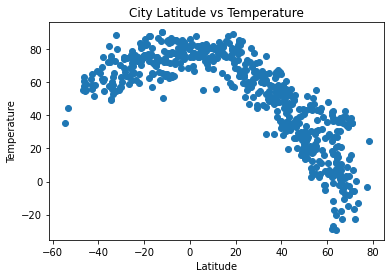

In [10]:
x_values = city_df['Latitude']
y_values = city_df['Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('City Latitude vs Temperature')
plt.show()

## Latitude vs. Humidity Plot

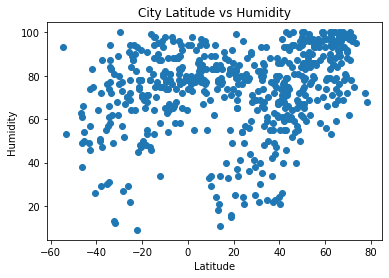

In [11]:
x_values = city_df['Latitude']
y_values = city_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

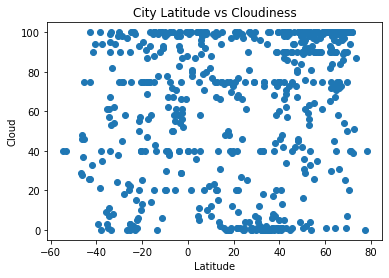

In [12]:
x_values = city_df['Latitude']
y_values = city_df['Cloud']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloud')
plt.title('City Latitude vs Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

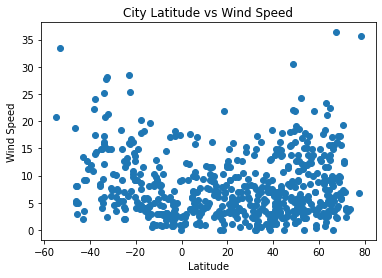

In [13]:
x_values = city_df['Latitude']
y_values = city_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
Northern_df=city_df.loc[city_df["Latitude"]>=0]
Northern_df
x_values = Northern_df['Latitude']
y_values = Northern_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

0       9.245718
1      75.240024
3      73.536022
6      23.101943
8      39.934180
         ...    
546    80.002804
547    74.516744
550    54.231785
552    44.383436
553    48.042456
Name: Latitude, Length: 377, dtype: float64
y = -1.24x +91.94


The r-value is: 0.764673610334512


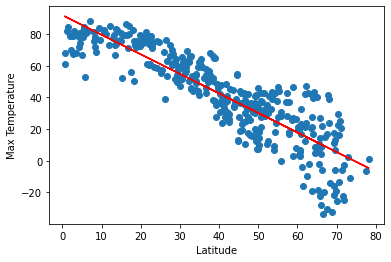

In [19]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

print(f"The r-value is: {rvalue**2}")
plt.annotate("y = -1.24x +91.94",(-5,5),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
Southern_df=city_df.loc[city_df["Latitude"]<0]
Southern_df
x_values = Southern_df['Latitude']
y_values = Southern_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

2      60.191597
4      76.643472
5      73.787218
7      80.428451
10     56.082722
         ...    
544    72.042809
545    72.596034
548    67.241698
549    68.735965
551    78.979009
Name: Latitude, Length: 177, dtype: float64
y = 0.48x +82.24


The r-value is: 0.3528103132598298


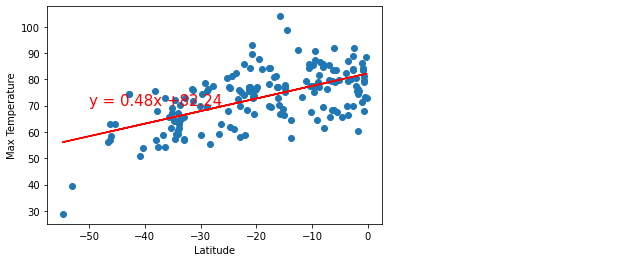

In [21]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.annotate("y = 0.48x +82.24",(-50,70),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [23]:
x_values = Northern_df['Latitude']
y_values = Northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

0      79.809861
1      65.675725
3      66.040674
6      76.842245
8      73.237250
         ...    
546    64.655670
547    65.830631
550    70.175103
552    72.284344
553    71.500684
Name: Latitude, Length: 377, dtype: float64
y = 0.26x +62.1


The r-value is: 0.06829809150793437


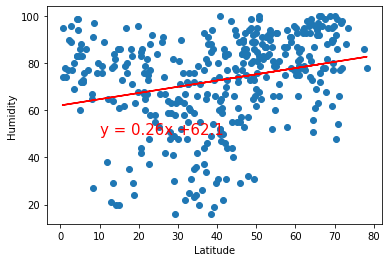

In [24]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {rvalue**2}")
plt.annotate("y = 0.26x +62.1",(10,50),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [25]:
x_values = Southern_df['Latitude']
y_values = Southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

2      63.709123
4      74.579522
5      72.692283
7      77.080406
10     60.994228
         ...    
544    71.539684
545    71.905221
548    68.367401
549    69.354722
551    76.122703
Name: Latitude, Length: 177, dtype: float64
y = 0.32x +78.28


The r-value is: 0.06868391061035918


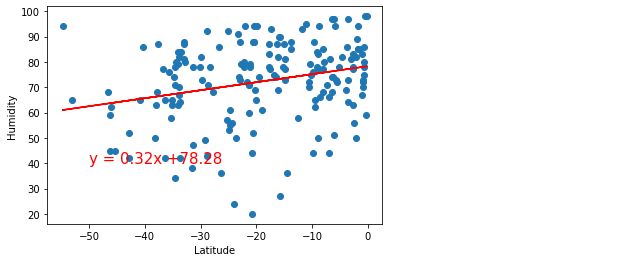

In [26]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.annotate("y = 0.32x +78.28",(-50,40),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [27]:
x_values = Northern_df['Latitude']
y_values = Northern_df['Cloud']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

0      66.394532
1      45.896416
3      46.425686
6      62.090729
8      56.862563
         ...    
546    44.417076
547    46.121070
550    52.421666
552    55.480605
553    54.344098
Name: Latitude, Length: 377, dtype: float64
y = 0.38x +40.71


The r-value is: 0.033287319621799864


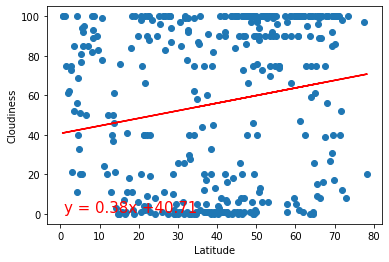

In [28]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue**2}")
plt.annotate("y = 0.38x +40.71",(1,1),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [29]:
x_values = Southern_df['Latitude']
y_values = Southern_df['Cloud']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

2      43.475303
4      65.265633
5      61.482556
7      70.278797
10     38.033142
         ...    
544    59.172105
545    59.904846
548    52.813086
549    54.792226
551    68.359028
Name: Latitude, Length: 177, dtype: float64
y = 0.63x +72.68


The r-value is: 0.055569971950119014


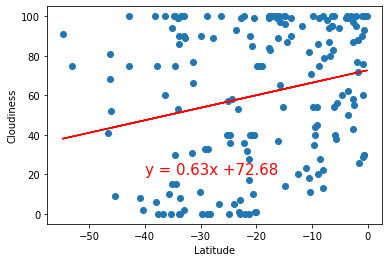

In [30]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue**2}")
plt.annotate("y = 0.63x +72.68",(-40,20),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [31]:
x_values = Northern_df['Latitude']
y_values = Northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

0      9.691810
1      5.810340
3      5.910561
6      8.876853
8      7.886861
         ...   
546    5.530215
547    5.852879
550    7.045944
552    7.625177
553    7.409971
Name: Latitude, Length: 377, dtype: float64
y = 0.07x +4.83


The r-value is: 0.0545284924184994


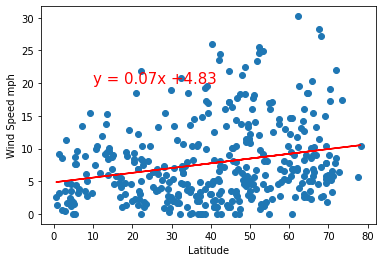

In [32]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')

print(f"The r-value is: {rvalue**2}")
plt.annotate("y = 0.07x +4.83",(10,20),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [33]:
x_values = Southern_df['Latitude']
y_values = Southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

2      10.368823
4       6.430236
5       7.114024
7       5.524110
10     11.352489
         ...    
544     7.531637
545     7.399194
548     8.681025
549     8.323297
551     5.871107
Name: Latitude, Length: 177, dtype: float64
y = -0.11x +5.09


The r-value is: 0.09653297402071774


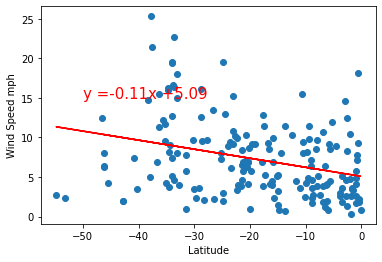

In [37]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')

print(f"The r-value is: {rvalue**2}")
plt.annotate("y =-0.11x +5.09",(-50,15),fontsize=15,color="red")

plt.show()